# Requirements

In [37]:

import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify_songs.csv')

Preprocess the input and the output variables appropriately.

In [6]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


Explore the dataset using visualizations of your choice.

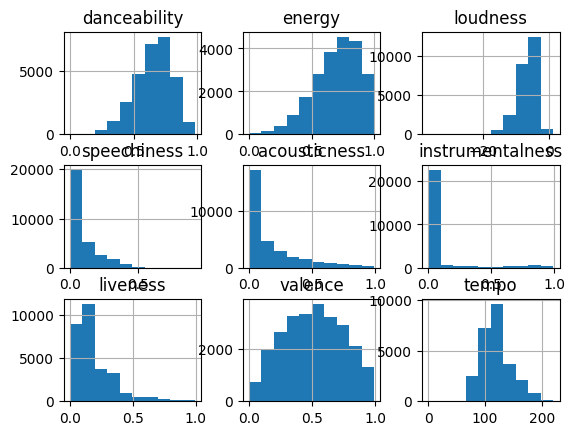

In [9]:
df.hist()
plt.show()

Check if the dataset is balanced.

In [10]:
df['genre'].value_counts()

,count
genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [11]:
missing_val=df.isnull().sum()
mising_val_perc=missing_val/len(df)*100
print(missing_val,mising_val_perc)

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64 danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

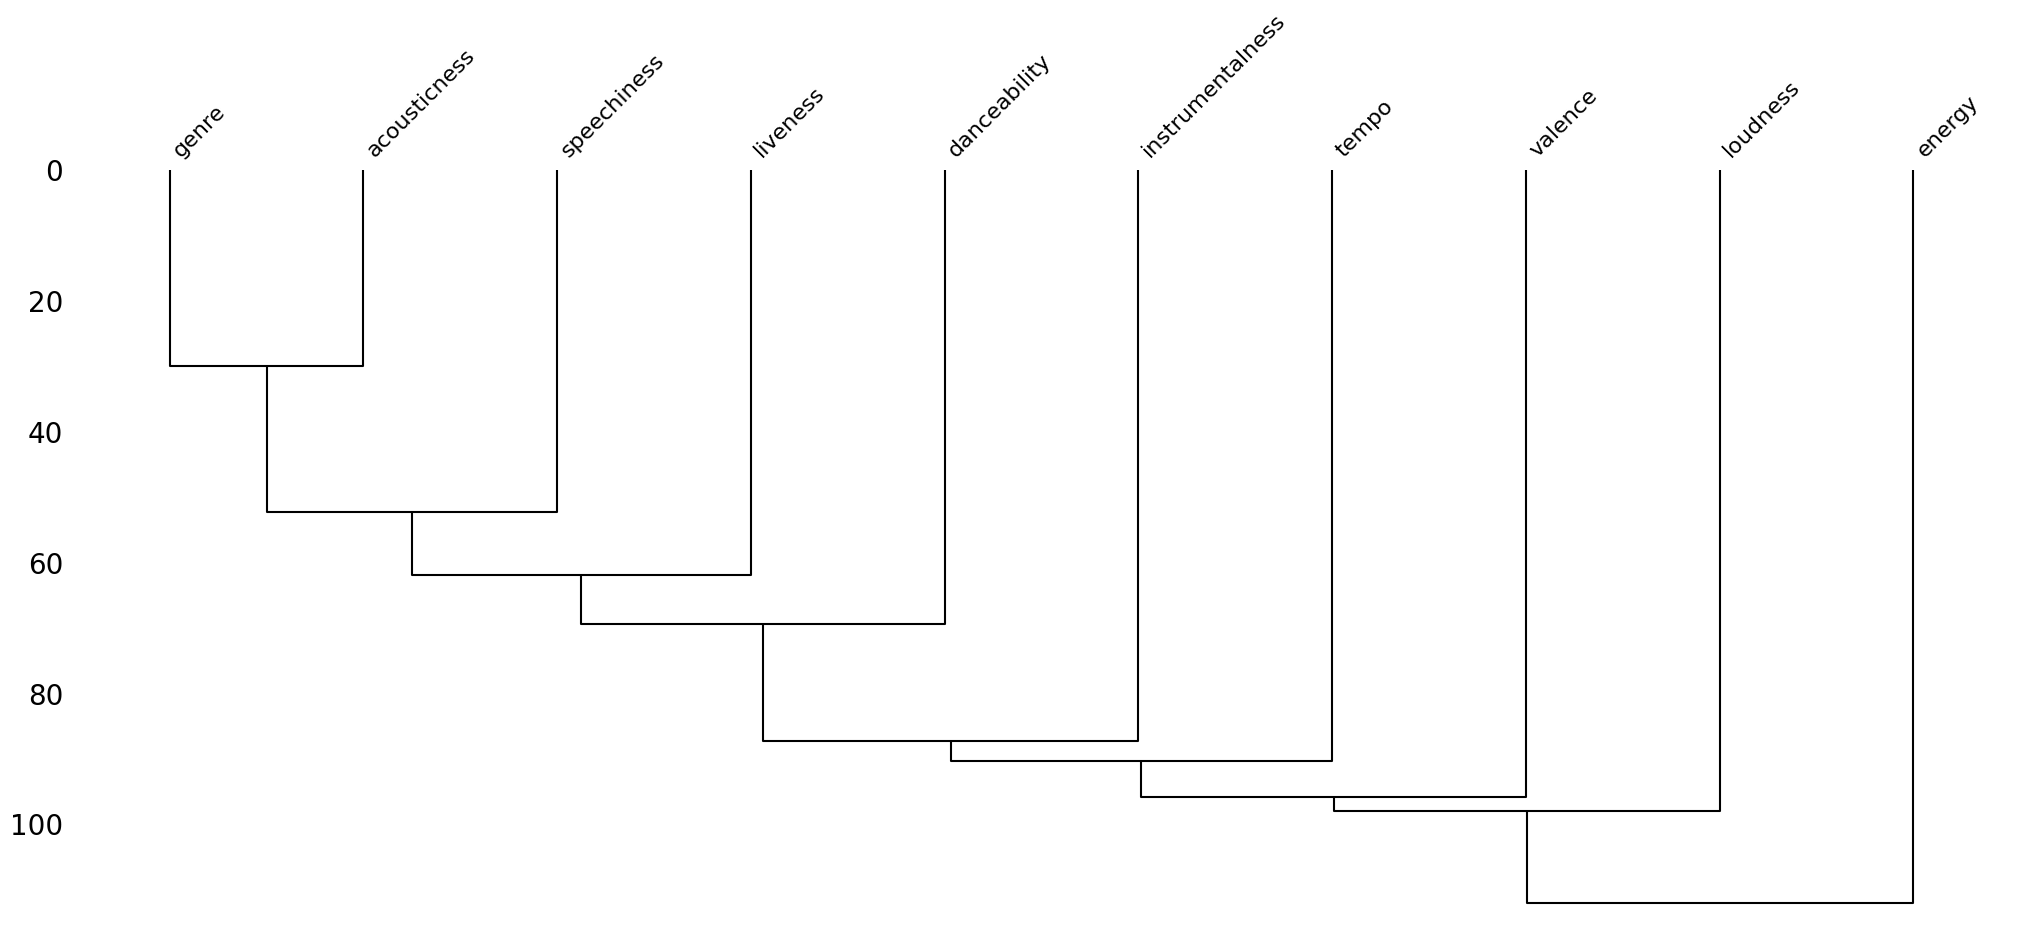

In [14]:
msno.dendrogram(df)

<Axes: >

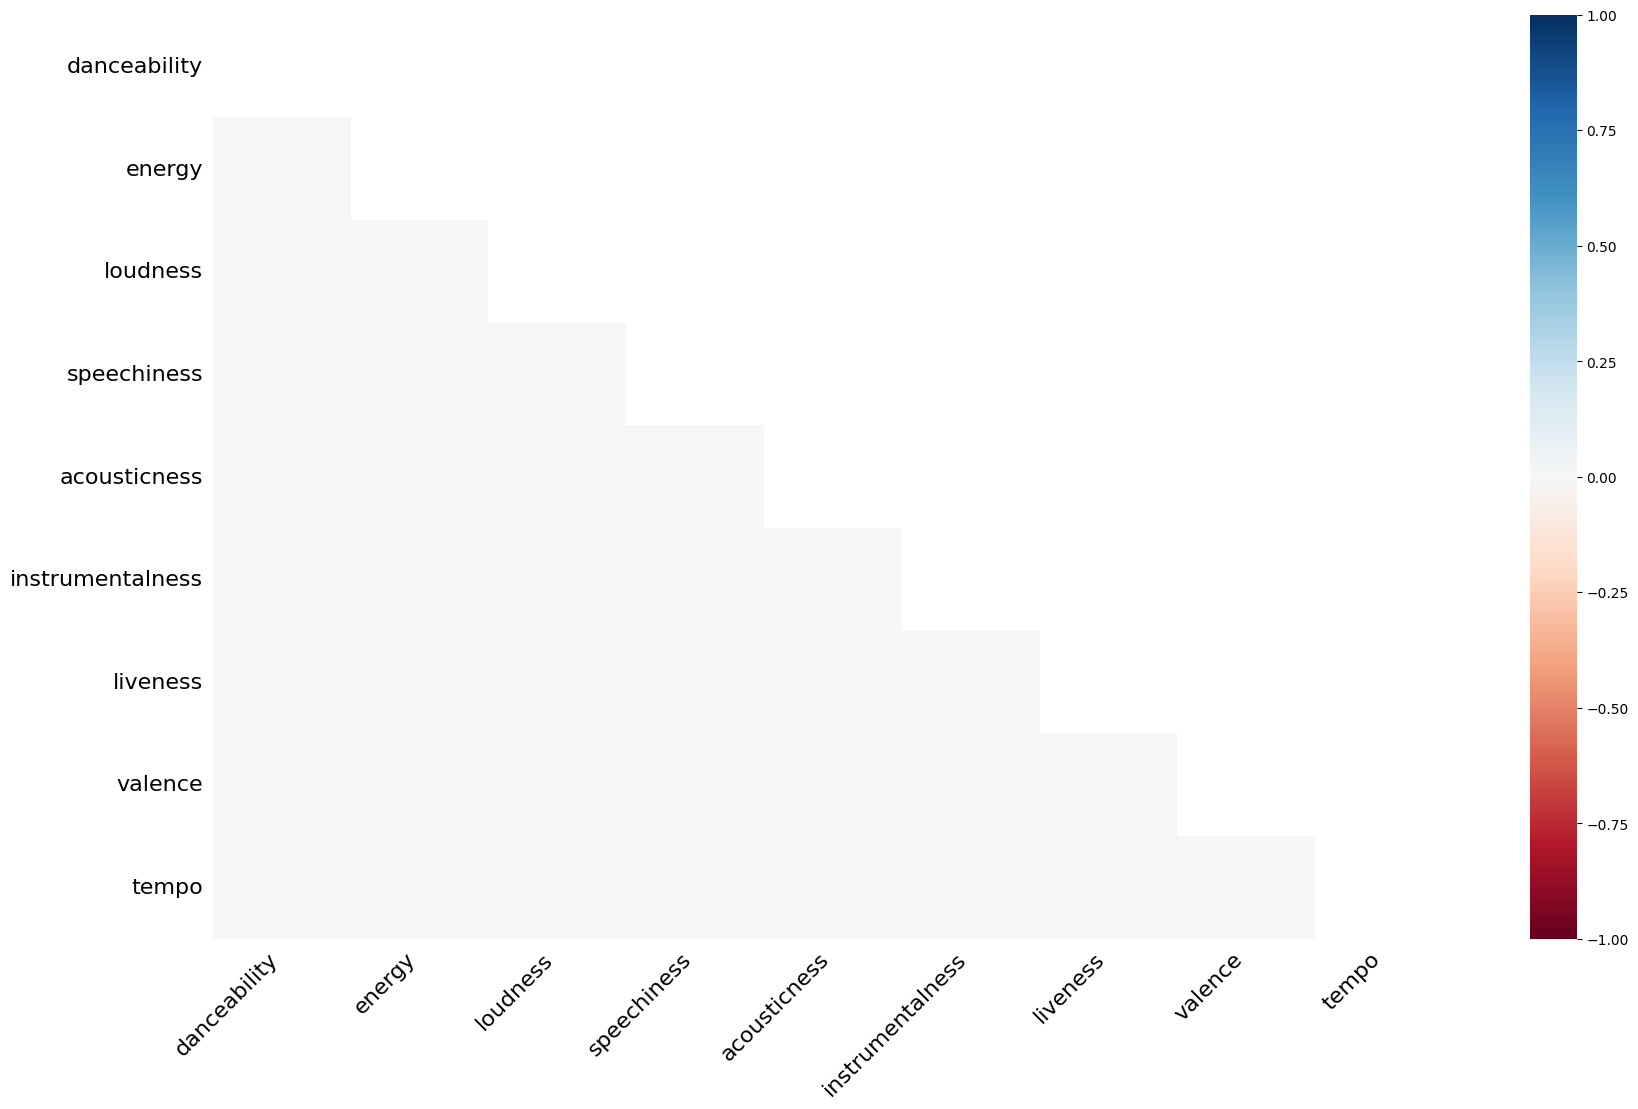

In [15]:
msno.heatmap(df)

<Axes: >

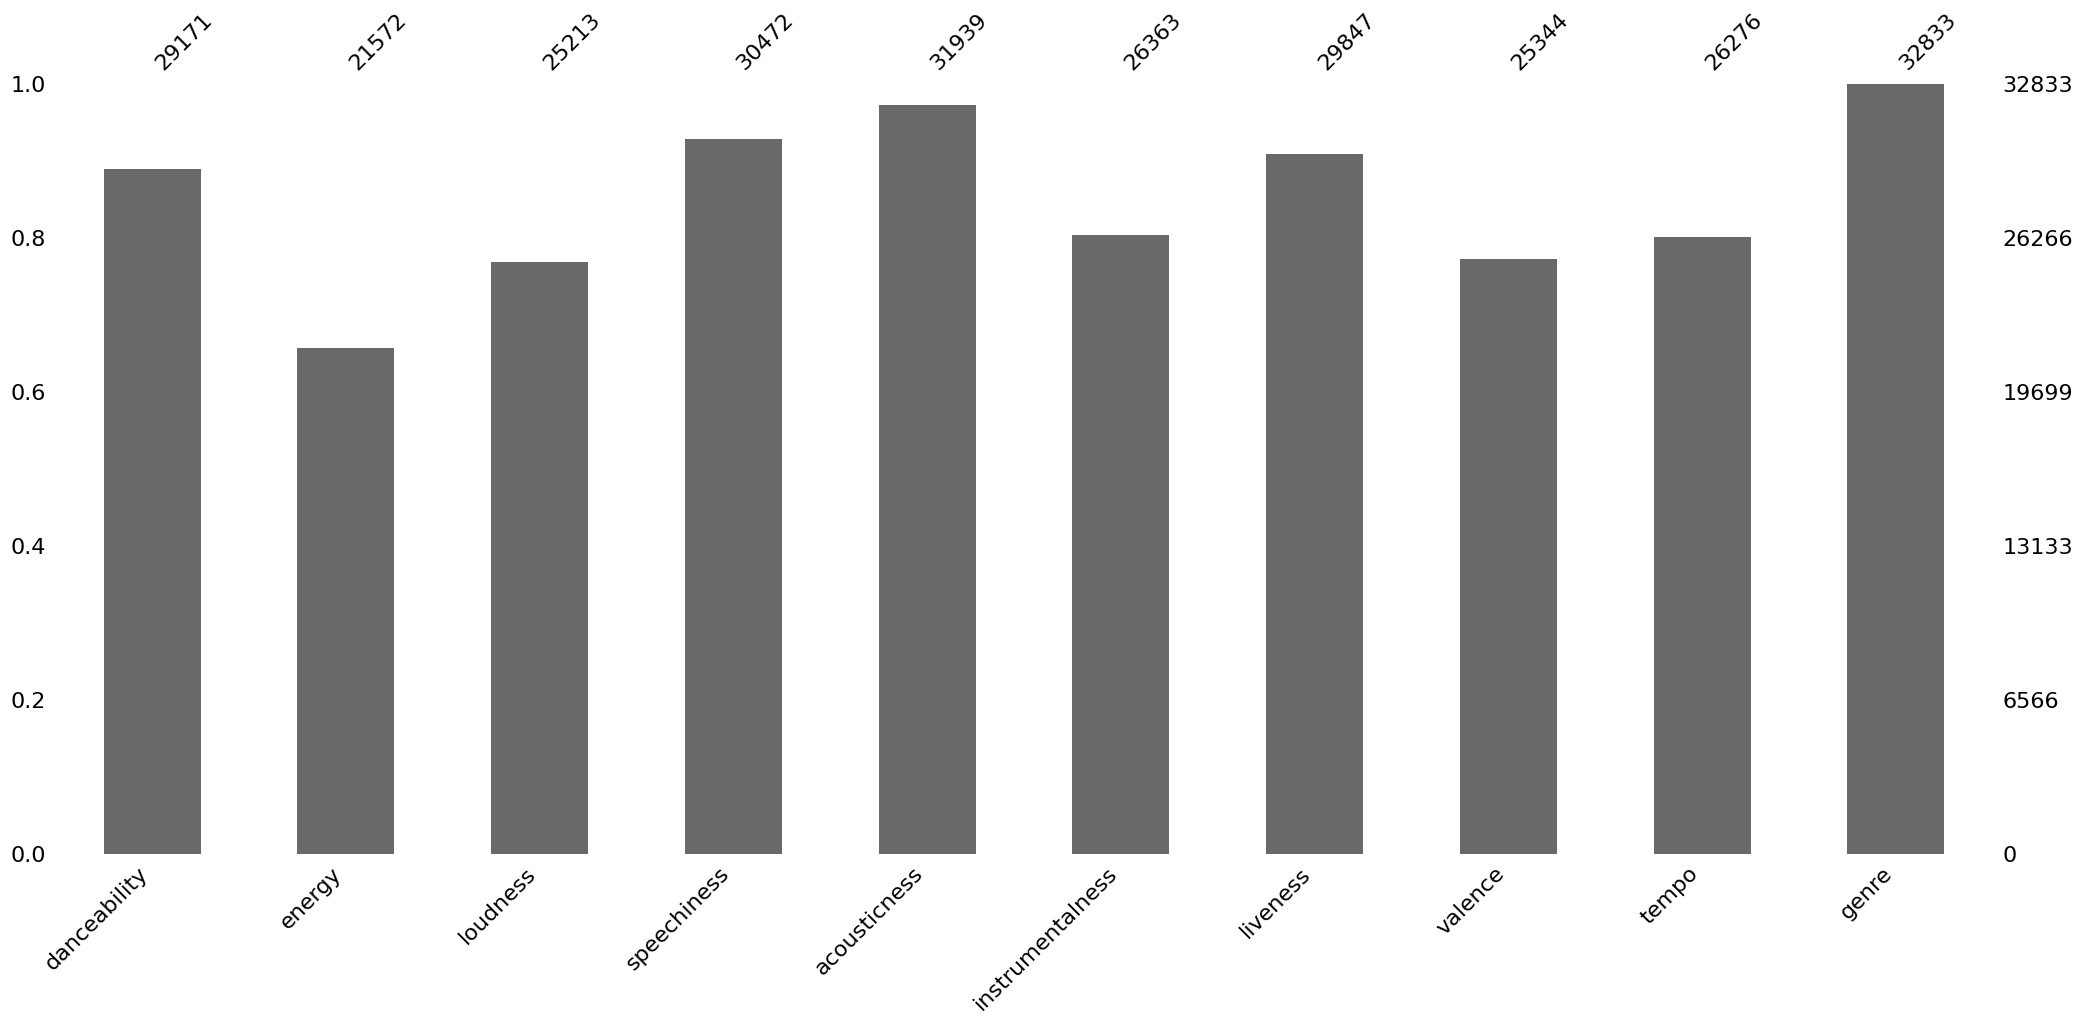

In [16]:
msno.bar(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [18]:
from sklearn.impute import KNNImputer
def knn_impute_data(data:pd.DataFrame, columns:list, n_neighbors:int):
   imputer = KNNImputer(n_neighbors=n_neighbors)
   data_copy = data.copy()

   for column in columns:
     data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
   return data_copy

In [20]:
df=knn_impute_data(data=df,columns=['danceability',	'energy',	'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence'	,'tempo'	],n_neighbors=5)

In [21]:
df.isnull().sum()

,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0
tempo,0
genre,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [79]:
X=df.iloc[:,:-1]

In [80]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916000,-2.634000,0.058300,0.102000,0.000000,0.0653,0.5180,122.036000
1,0.726,0.697964,-4.969000,0.037300,0.072400,0.083894,0.3570,0.6930,99.972000
2,0.675,0.931000,-3.432000,0.074200,0.079400,0.083894,0.1100,0.6130,124.008000
3,0.718,0.930000,-3.778000,0.102000,0.028700,0.000009,0.2040,0.2770,120.905999
4,0.650,0.833000,-4.672000,0.035900,0.080300,0.000000,0.0833,0.7250,123.976000
...,...,...,...,...,...,...,...,...,...
32828,0.428,0.697964,-1.814000,0.093600,0.076600,0.000000,0.0668,0.2100,128.170000
32829,0.522,0.786000,-4.462000,0.042000,0.001710,0.004270,0.3750,0.4000,128.041000
32830,0.529,0.821000,-4.899000,0.048100,0.108000,0.083894,0.1500,0.4360,127.989000
32831,0.626,0.697964,-6.700534,0.109000,0.007920,0.127000,0.3430,0.3080,128.008000


In [30]:
.drop(columns=['genre'],axis=1,inplace=True)

In [31]:
input.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916000,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036000
1,0.726,0.697964,-4.969,0.0373,0.0724,0.083894,0.3570,0.693,99.972000
2,0.675,0.931000,-3.432,0.0742,0.0794,0.083894,0.1100,0.613,124.008000
3,0.718,0.930000,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,120.905999
4,0.650,0.833000,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976000


In [32]:
le=LabelEncoder()

In [33]:
df['genre']=le.fit_transform(df['genre'])
df['genre'].value_counts()

,count
genre,
0,6043
4,5746
2,5507
3,5431
1,5155
5,4951


In [68]:
target=df.copy()['genre']
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [69]:
scaler=StandardScaler()

In [70]:
scaler.fit(x_train)

StandardScaler()

In [71]:
x_train=scaler.transform(x_train)

In [72]:
x_test=scaler.transform(x_test)

## Model Selection

Choose and train an approriate model for the given task.

In [73]:
model=XGBClassifier(max_depth=5,n_estimators=100,learning_rate=0.1,n_jobs=-1,min_child_weight=3)

In [74]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

Use the trained model to make predictions for the test set.

In [75]:
y_pred=model.predict(x_test)

Assess the performance of the model by using different classification metrics.

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.63      1197
           1       0.43      0.38      0.40      1045
           2       0.34      0.29      0.31      1129
           3       0.38      0.34      0.36      1050
           4       0.54      0.62      0.58      1168
           5       0.58      0.67      0.62       978

    accuracy                           0.49      6567
   macro avg       0.48      0.49      0.48      6567
weighted avg       0.48      0.49      0.49      6567



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.